In [1]:
from IPython.display import clear_output

In [2]:
!pip install datasets matplotlib pandas seaborn
clear_output()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

In [4]:
dataset = load_dataset('squad')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/1.82M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

In [5]:

train_data = dataset['train']
df = pd.DataFrame(train_data)

In [6]:
#dataset overview
print("Data Overview:")
print("Number of examples:", len(df))
print("Features:", df.columns.tolist())
print("Data Types:\n", df.dtypes)

Data Overview:
Number of examples: 87599
Features: ['id', 'title', 'context', 'question', 'answers']
Data Types:
 id          object
title       object
context     object
question    object
answers     object
dtype: object


In [7]:
# sample
print("\nsample:")
print(df[['context', 'question', 'answers']].sample(5, random_state=42).to_string(index=False))


sample:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   context                                                                     question                        

In [8]:

# counting Questions and Answers
total_questions = len(df)
total_answers = df['answers'].apply(lambda x: len(x['text'])).sum()

print(f"\nTotal number of questions: {total_questions}")
print(f"Total number of answers: {total_answers}")



Total number of questions: 87599
Total number of answers: 87599


In [9]:
# context Length
df['context_length'] = df['context'].apply(lambda x: len(x.split()))
print("\nContext Length Analysis (first 5):")
print(df['context_length'].head())



Context Length Analysis (first 5):
0    124
1    124
2    124
3    124
4    124
Name: context_length, dtype: int64


In [10]:
# question length
df['question_length'] = df['question'].apply(lambda x: len(x.split()))
print("\nQuestion Length Analysis (first 5):")
print(df['question_length'].head())


Question Length Analysis (first 5):
0    13
1    10
2    14
3     7
4    11
Name: question_length, dtype: int64


In [11]:
# questions type distribution
def categorize_question(question):
    if any(word in question.lower() for word in ['is', 'are', 'do', 'does', 'can']):
        return 'Yes/No'
    elif question.lower().startswith('how'):
        return 'How'
    elif question.lower().startswith('what'):
        return 'What'
    elif question.lower().startswith('who'):
        return 'Who'
    elif question.lower().startswith('where'):
        return 'Where'
    elif question.lower().startswith('when'):
        return 'When'
    else:
        return 'Other'

df['question_type'] = df['question'].apply(categorize_question)
question_type_counts = df['question_type'].value_counts()
print("\nQuestion Type Distribution:\n", question_type_counts)


Question Type Distribution:
 question_type
Yes/No    48575
What      14620
Other     11190
Who        5136
When       3414
How        3358
Where      1306
Name: count, dtype: int64


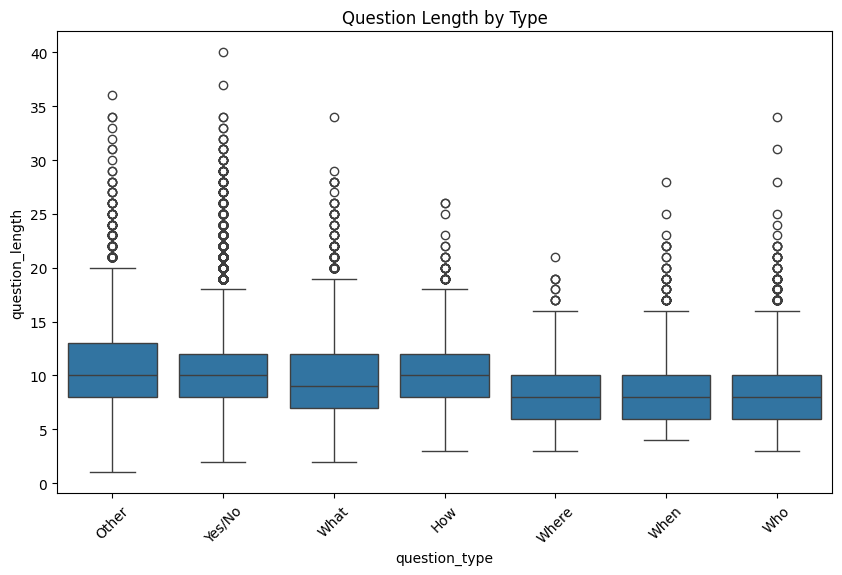

In [12]:
# length vs. type
plt.figure(figsize=(10, 6))
sns.boxplot(x='question_type', y='question_length', data=df)
plt.title('Question Length by Type')
plt.xticks(rotation=45)
plt.show()

In [13]:
#answer span
df['answer_length'] = df['answers'].apply(lambda x: len(x['text'][0].split()) if x['text'] else 0)
print("\nAnswer Span Length Analysis (first 5):")
print(df['answer_length'].head())



Answer Span Length Analysis (first 5):
0    3
1    5
2    3
3    7
4    7
Name: answer_length, dtype: int64


In [14]:
# overlap
def check_answer_overlap(row):
    context = row['context']
    answer = row['answers']['text'][0] if row['answers']['text'] else ""
    return int(answer in context)

df['answer_overlap'] = df.apply(check_answer_overlap, axis=1)
overlap_percentage = df['answer_overlap'].mean() * 100
print(f"\nPercentage of answers overlapping with context: {overlap_percentage:.2f}%")


Percentage of answers overlapping with context: 100.00%


In [15]:
# repetition
context_counts = df['context'].value_counts()
unique_contexts = len(context_counts)
repeated_contexts = context_counts[context_counts > 1].count()
print(f"\nUnique contexts: {unique_contexts}")
print(f"Repeated contexts: {repeated_contexts}")


Unique contexts: 18891
Repeated contexts: 18576


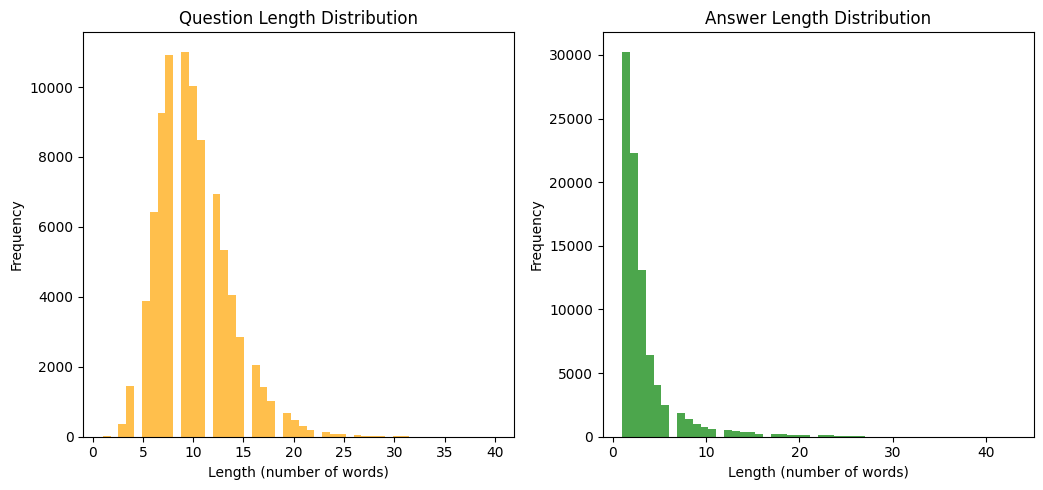

<ipython-input-16-3b5234a13250>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=question_type_counts.index, y=question_type_counts.values, palette='viridis')


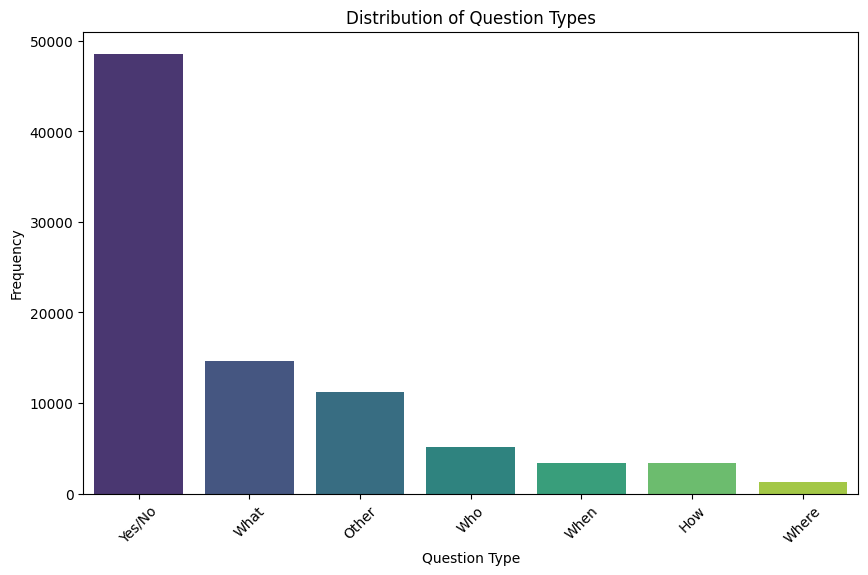


Missing Values:
 Series([], dtype: int64)


In [16]:
# histograms for length distributions
plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 2)
plt.hist(df['question_length'], bins=50, color='orange', alpha=0.7)
plt.title('Question Length Distribution')
plt.xlabel('Length (number of words)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['answer_length'], bins=50, color='green', alpha=0.7)
plt.title('Answer Length Distribution')
plt.xlabel('Length (number of words)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#  bar charts
plt.figure(figsize=(10, 6))
sns.barplot(x=question_type_counts.index, y=question_type_counts.values, palette='viridis')
plt.title('Distribution of Question Types')
plt.xlabel('Question Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values[missing_values > 0])



In [17]:
correlation_matrix = df[['context_length', 'question_length', 'answer_length']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)



Correlation Matrix:
                  context_length  question_length  answer_length
context_length         1.000000         0.016081       0.028785
question_length        0.016081         1.000000      -0.043472
answer_length          0.028785        -0.043472       1.000000
